In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import random
import math
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

In [2]:
def distance(x1, y1, x2, y2):
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

In [3]:
def contact_prob(distance, contact_density,x1, y1, x2, y2):
    d = distance(x1, y1, x2, y2)
    return math.exp(-d/contact_density)

In [4]:
#configuration parameters
n = 25 #number of nodes
infection_rate = 0.3 #probability of infection
recovery_rate = 0.1 #probability of recovery
timesteps = 100 #number of timesteps
contact_density = 1 #radius of contact

In [5]:
root = int(math.sqrt(n))
G_grid = nx.grid_2d_graph(root, root)

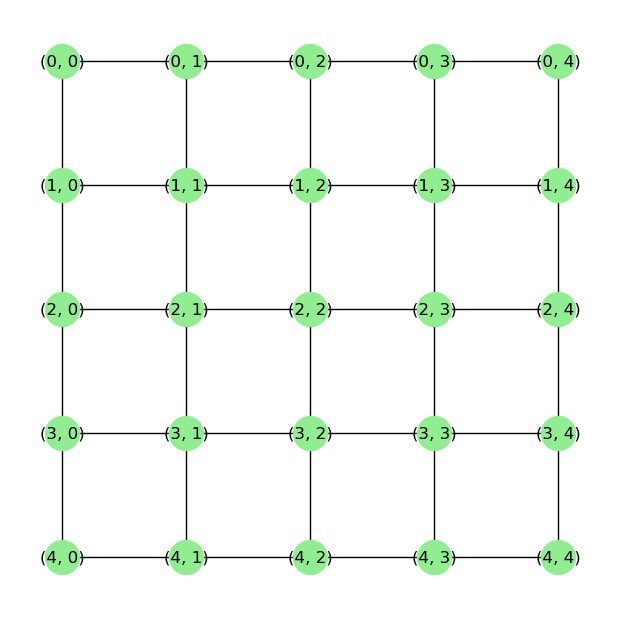

In [6]:
plt.figure(figsize=(6,6))
pos = {(x,y):(y,-x) for x,y in G_grid.nodes()}
nx.draw(G_grid, pos=pos, 
        node_color='lightgreen', 
        with_labels=True,
        node_size=600)

In [8]:
#sample the random graph based on the contact probability function
G = nx.Graph()
for index1, node1 in enumerate(G_grid.nodes()):
    for index2, node2 in enumerate(G_grid.nodes()):
        if index2 > index1:
            if random.random() < contact_prob(distance, contact_density, node1[0], node1[1], node2[0], node2[1]):
                G.add_edge(node1, node2)
#set the colors
#S = susceptible (green)
#I = infected (red)
#R = recovered (blue)
count = 0
for node in G.nodes():
    G.nodes[node]['state'] = 'S'    
    G.nodes[node]['color'] = 'green'


300


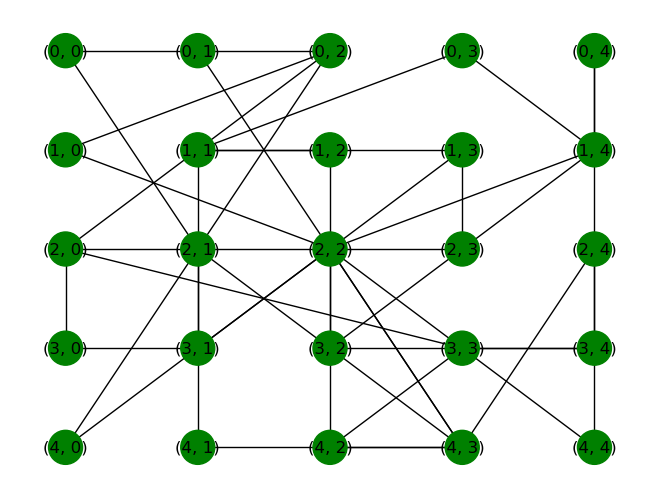

In [9]:
labels = nx.get_node_attributes(G, 'state')
colors = nx.get_node_attributes(G, 'color')
nx.draw(G, pos=pos, node_color=list(colors.values()), with_labels=True, node_size=600)

In [9]:
def infect(G, node):
    if G.nodes[node]['state'] == 'S':
        G.nodes[node]['state'] = 'I'
        G.nodes[node]['color'] = 'red'
        return True
    return False

In [10]:
def recover(G, node):
    if G.nodes[node]['state'] == 'I':
        G.nodes[node]['state'] = 'R'
        G.nodes[node]['color'] = 'blue'
        return True
    return False

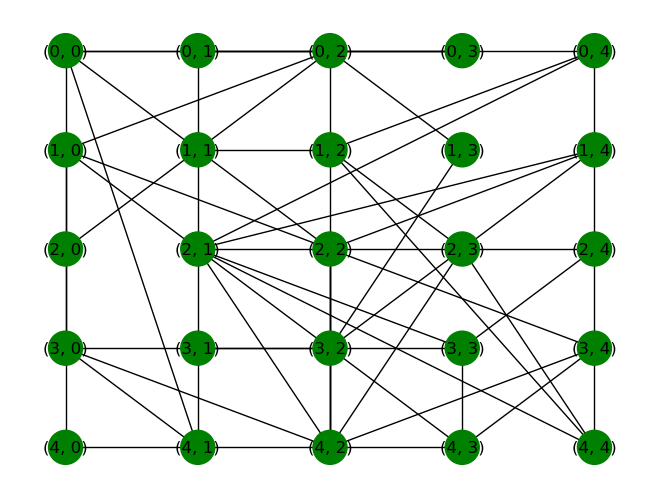

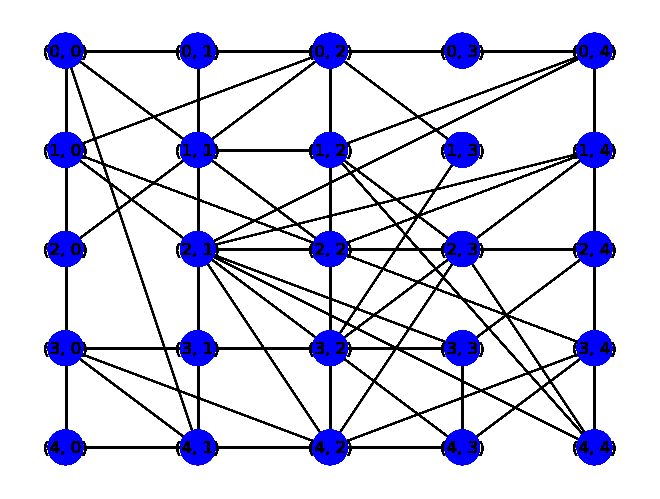

In [11]:
#infect a random node
infect(G, random.choice(list(G.nodes())))
nx.draw(G, pos=pos, node_color=list(colors.values()), with_labels=True, node_size=600)
plt.show()
for i in range(timesteps):
    for node in G.nodes():
        if G.nodes[node]['state'] == 'I':
            for neighbor in G.neighbors(node):
                if random.random() < infection_rate:
                    infect(G, neighbor)
            if random.random() < recovery_rate:
                recover(G, node)
    labels = nx.get_node_attributes(G,'state')
    colors = nx.get_node_attributes(G,'color')
    nx.draw(G, pos=pos, node_color=list(colors.values()), with_labels=True, node_size=600)

MovieWriter imagemagick unavailable; using Pillow instead.


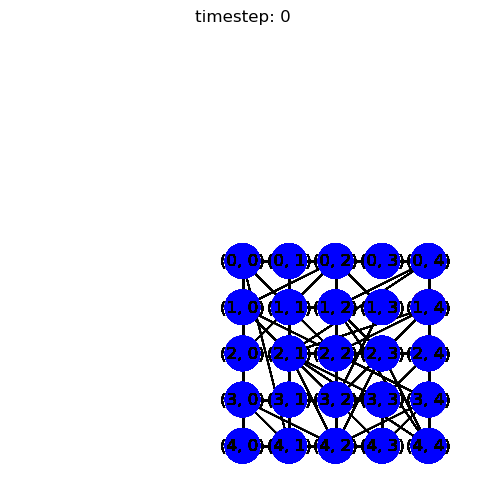

In [26]:
#animate the simulation and save it as a gif
for node in G.nodes():
    G.nodes[node]['state'] = 'S'    
    G.nodes[node]['color'] = 'green'
infect(G, random.choice(list(G.nodes())))
fig = plt.figure(figsize=(6,6))
ax = plt.axes(xlim=(-root, root), ylim=(-root, root))
nx.draw(G, pos=pos, node_color=list(colors.values()), with_labels=True, node_size=600)
def animate(i):
    for node in G.nodes():
        if G.nodes[node]['state'] == 'I':
            for neighbor in G.neighbors(node):
                if random.random() < infection_rate:
                    infect(G, neighbor)
            if random.random() < recovery_rate:
                recover(G, node)
    labels = nx.get_node_attributes(G,'state')
    colors = nx.get_node_attributes(G,'color')
    plt.title('timestep: ' + str(i))
    nx.draw(G, pos=pos, node_color=list(colors.values()), with_labels=True, node_size=600)
anim = FuncAnimation(fig, animate, frames=50, interval=30)
anim.save('geonet.gif', writer='imagemagick', fps=15)
